In [2]:
import pandas as pd
import random
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [4]:
train_path = "C:\\Users\\absub\\Downloads\\Car_Color\\train"
test_path = "C:\\Users\\absub\\Downloads\\Car_Color\\test"
val_path = "C:\\Users\\absub\\Downloads\\Car_Color\\val"


In [5]:
import os
def load_images_from_folder(folder_path):
    images = []
    labels = []
    color_classes = os.listdir(folder_path)
    for color_class in color_classes:
        color_path = os.path.join(folder_path, color_class)
        for filename in os.listdir(color_path):
            img = Image.open(os.path.join(color_path, filename))
            if img is not None:
                img = img.resize((128, 128))  # Resize if necessary
                img_array = np.array(img)  # Convert image to numpy array
                images.append(img_array)
                labels.append(color_class)
    return images, labels

In [6]:
train_images, train_labels = load_images_from_folder(train_path)
test_images, test_labels = load_images_from_folder(test_path)
val_images, val_labels = load_images_from_folder(val_path)

In [5]:
images = train_images+test_images+val_images
colors = train_labels+test_labels+val_labels

In [6]:
len(np.unique(colors))

15

In [7]:
unique_colors = list(np.unique(colors))
unique_colors

['beige',
 'black',
 'blue',
 'brown',
 'gold',
 'green',
 'grey',
 'orange',
 'pink',
 'purple',
 'red',
 'silver',
 'tan',
 'white',
 'yellow']

In [8]:
type(unique_colors)

list

In [9]:
colors_count = dict(Counter(colors))
colors_count

{'beige': 601,
 'black': 579,
 'blue': 1060,
 'brown': 807,
 'gold': 300,
 'green': 804,
 'grey': 611,
 'orange': 762,
 'pink': 689,
 'purple': 765,
 'red': 909,
 'silver': 516,
 'tan': 571,
 'white': 575,
 'yellow': 824}

C:\Users\absub\AppData\Local\Temp\ipykernel_3900\907575634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(colors_count.keys()), y=list(colors_count.values()), palette={key: key if key not in ['white'] else 'lightgrey' for key in list(colors_count.keys())})


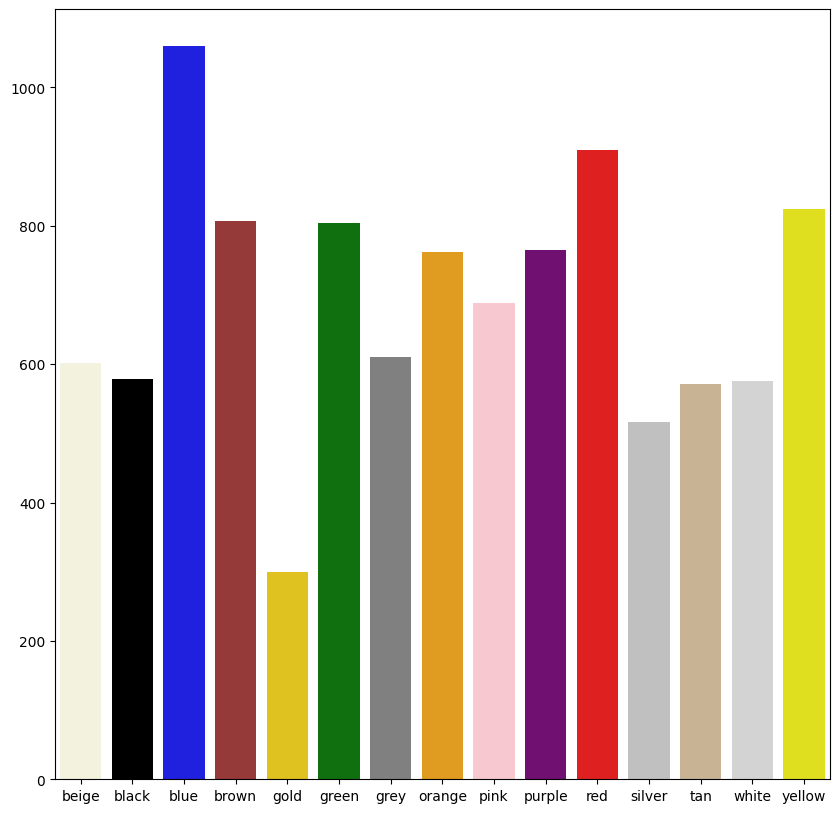

In [10]:
plt.figure(figsize=(10,10))
sns.barplot(x=list(colors_count.keys()), y=list(colors_count.values()), palette={key: key if key not in ['white'] else 'lightgrey' for key in list(colors_count.keys())})
plt.show()

In [11]:
def display_random_images(images, colors,num_images=3):
    num_cols = 7  # Number of columns for subplots (adjust as needed)
    num_rows = (num_images + num_cols - 1) // num_cols  # Calculate number of rows needed
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

    for i in range(num_images):
        row = i//num_cols
        col = i % num_cols
        # Select a random index
        random_index = random.randint(0, len(images) - 1)
        image = images[random_index]
        color = colors[random_index]

        # Load and display the image
        axs[row, col].imshow(image)
        axs[row, col].set_title(f'color: {color}')
        axs[row, col].axis('off')
        
    for i in range(num_images, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        axs[row, col].axis('off')
        
    plt.tight_layout()
    plt.show()

In [12]:
colors[3490]

'orange'

In [13]:
images[9].shape

(128, 128, 3)

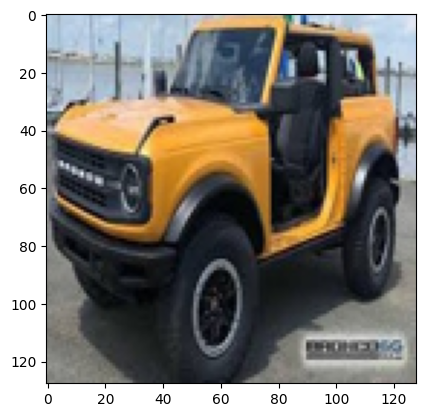

In [14]:
plt.imshow(images[3490])

In [ ]:
display_random_images(images,colors, 21)

In [ ]:
# Example of data augmentation with ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,            
    width_shift_range=0.2,        
    height_shift_range=0.2,       
    horizontal_flip=True,     
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

# Convert images to NumPy arrays after augmentation
images_augmented = []
for image in images:
    augmented_image = datagen.random_transform(image)
    images_augmented.append(augmented_image)

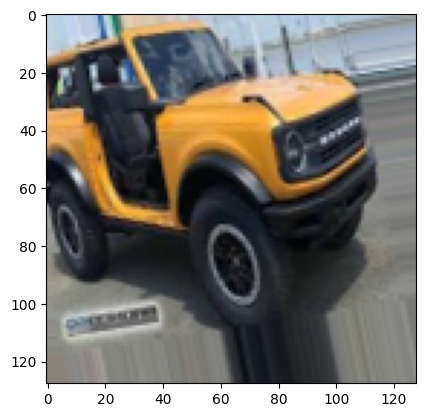

In [21]:
plt.imshow(images_augmented[3490])

In [ ]:
len(images_augmented)

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
numerical_labels = label_encoder.fit_transform(colors)

In [ ]:
numerical_labels

In [ ]:
len(numerical_labels)

In [ ]:
len(images)

In [ ]:
labelled = []
for label, numerical_label in zip(colors, numerical_labels):
    pair=(label,numerical_label)
    if pair not in labelled:
        labelled.append(pair)
labelled = sorted(labelled)
labelled

In [ ]:
images_f = np.array(images_augmented)
labels_f = np.array(numerical_labels)

In [ ]:
images_f_2 = images_f/255
images_f_2[0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images_f_2, labels_f, test_size=0.3, random_state=42)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.75, random_state=3)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_val.shape, y_val.shape

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

class_weight = dict(zip(np.unique(y_train), class_weights))

In [ ]:
class_weight

In [ ]:
# Define the model
model = Sequential()

# Add layers
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.0001), input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00005),
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])

# Model summary
model.summary()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [ ]:
fle_s='Car_Color_Detection.keras'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode="auto",save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=50,monitor='val_loss',restore_best_weights='True')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5)
callback_list=[checkpoint,Early_stop, lr_scheduler]

In [ ]:
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val), callbacks=callback_list, class_weight=class_weight)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)
plt.grid()

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
pred=model.predict(X_test)